In [55]:
import pandas as pd

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

import os
os.chdir("D:/my_py_packages/supplyseer")

from src.supplyseer.models.ml.bayesiandag import ProbabilisticNet

In [2]:
df = pd.read_csv("D:/my_py_packages/supplyseer/supply_chain_data.csv")

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
for col in df.columns:
    if df[col].dtype == object:
        print(f"Feature {col} has these unique groups: {df[col].nunique()}")
        print("---"*15)

Feature Product type has these unique groups: 3
---------------------------------------------
Feature SKU has these unique groups: 100
---------------------------------------------
Feature Customer demographics has these unique groups: 4
---------------------------------------------
Feature Shipping carriers has these unique groups: 3
---------------------------------------------
Feature Supplier name has these unique groups: 5
---------------------------------------------
Feature Location has these unique groups: 5
---------------------------------------------
Feature Inspection results has these unique groups: 3
---------------------------------------------
Feature Transportation modes has these unique groups: 4
---------------------------------------------
Feature Routes has these unique groups: 3
---------------------------------------------


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for col in df.drop(columns="SKU").columns:
    if df[col].dtype == object:
        encoder = LabelEncoder()
        df[col+"_code"] = encoder.fit_transform(df[col].values)



In [7]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Routes,Costs,Product type_code,Customer demographics_code,Shipping carriers_code,Supplier name_code,Location_code,Inspection results_code,Transportation modes_code,Routes_code
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Route B,187.752075,1,2,1,2,4,2,2,1
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Route B,503.065579,2,0,0,2,4,2,2,1
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Route C,141.920282,1,3,1,0,4,2,0,2
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Route A,254.776159,2,2,2,4,3,0,1,0
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Route A,923.440632,2,2,0,0,2,0,0,0


In [8]:
df["Price_bins"] = pd.cut(df["Price"], bins=4, labels=False)
df["Price_bins_vals"] = pd.cut(df["Price"], bins=4)

In [46]:
df["Inspection results"]

0     Pending
1     Pending
2     Pending
3        Fail
4        Fail
       ...   
95    Pending
96    Pending
97       Fail
98    Pending
99       Fail
Name: Inspection results, Length: 100, dtype: object

In [9]:
features = ["Product type_code", "Customer demographics_code", "Shipping carriers_code", "Supplier name_code", "Location_code",
            "Transportation modes_code", "Routes_code", "Price_bins"]

bn_df = df[features]

In [10]:
learner = gum.BNLearner(bn_df)
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc("Product type_code","Customer demographics_code") # smoking->lung_cancer
# I know that visit to Asia may change the risk of tuberculosis
learner.addMandatoryArc("Customer demographics_code","Price_bins") # visit_to_Asia->tuberculosis
learner.addMandatoryArc("Transportation modes_code", "Routes_code")
learner.addMandatoryArc("Shipping carriers_code", "Routes_code")
learner.addMandatoryArc("Supplier name_code", "Transportation modes_code")
learner.addMandatoryArc("Routes_code", "Location_code")

learner.addMandatoryArc("Location_code", "Price_bins")

(pyAgrum.BNLearner<double>@0000011FCAFC3010) Filename                  : C:\Users\jako\AppData\Local\Temp\tmpy871foht.csv
Size                      : (100,8)
Variables                 : Product type_code[3], Customer demographics_code[4], Shipping carriers_code[3], Supplier name_code[5], Location_code[5], Transportation modes_code[4], Routes_code[3], Price_bins[4]
Induced types             : True
Missing values            : False
Algorithm                 : Greedy Hill Climbing
Score                     : BDeu  (Not used for constraint-based algorithms)
Correction                : MDL  (Not used for score-based algorithms)
Prior                     : -
Constraint Mandatory Arcs : {Product type_code->Customer demographics_code, Customer demographics_code->Price_bins, Supplier name_code->Transportation modes_code, Location_code->Price_bins, Transportation modes_code->Routes_code, Shipping carriers_code->Routes_code, Routes_code->Location_code}

In [11]:
bnlearned = learner.learnBN()


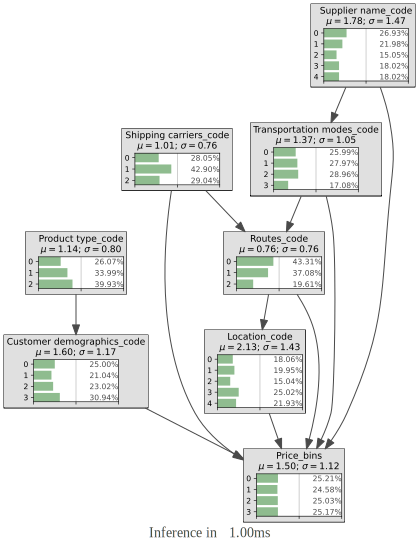

In [12]:
gnb.showInference(bnlearned, size="20")

#### The algorithm couldn't not learn from the data

In [13]:
gnb.flow.row(
             bnlearned, explain.getInformation(bnlearned), 
             captions=[
                       "Learned BN", "Information content"])

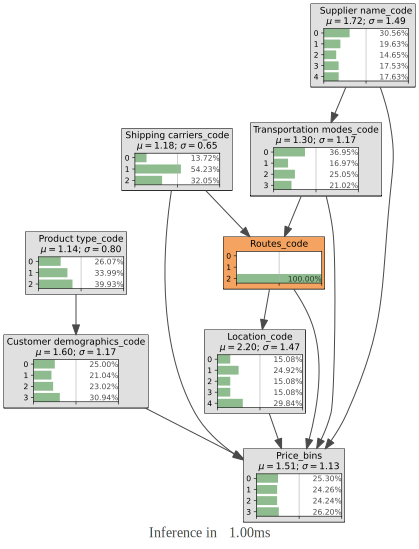

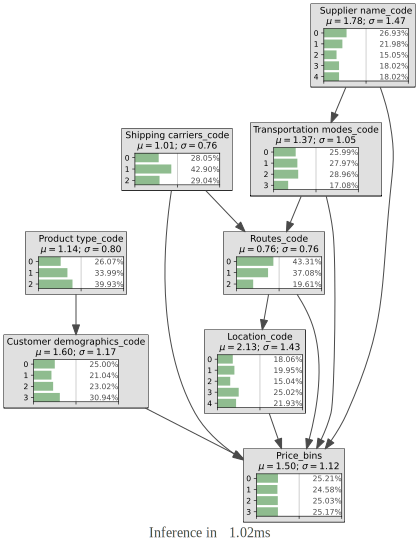

None,None


In [14]:

gnb.sideBySide(gnb.showInference(bnlearned, evs={"Routes_code":2}, targets={}, size="11"),
               gnb.showInference(bnlearned, evs={}, targets={}, size="11"))

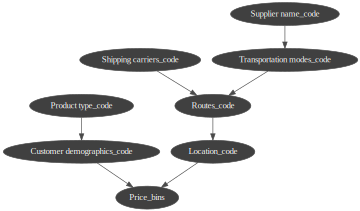

In [25]:
basemodel = ProbabilisticNet()
bn2 = basemodel.quick_BN("Supplier name_code[5]->Transportation modes_code[4];Shipping carriers_code[3]->Routes_code[3]<-Transportation modes_code;Routes_code->Location_code[5]->Price_bins[4];Product type_code[3]->Customer demographics_code[4]->Price_bins")
learner=gum.BNLearner(df,bn2)
bn2=learner.learnParameters(bn2.dag())
gnb.showBN(bn2)

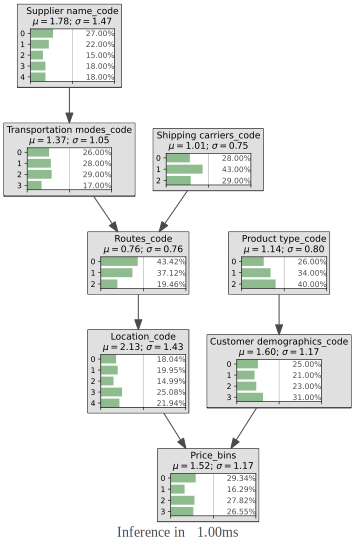

In [26]:
gnb.showInference(bn2)

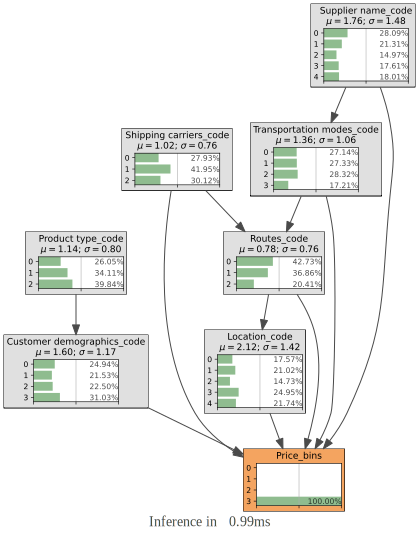

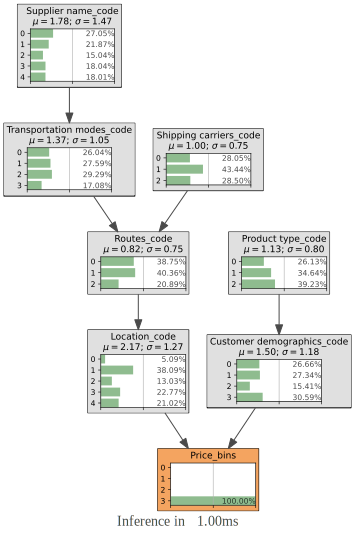

None,None


In [27]:

gnb.sideBySide(gnb.showInference(bnlearned, evs={"Price_bins":3}, targets={}, size="11"),
               gnb.showInference(bn2, evs={"Price_bins":3}, targets={}, size="11"))

In [58]:
bn_df.head()

,Product type_code,Customer demographics_code,Shipping carriers_code,Supplier name_code,Location_code,Transportation modes_code,Routes_code,Price_bins
0,1,2,1,2,4,2,1,2
1,2,0,0,2,4,2,1,0
2,1,3,1,0,4,0,2,0
3,2,2,2,4,3,1,0,2
4,2,2,0,0,2,0,0,0


In [57]:
preds_from_my_class = basemodel.inference_hard_evidence(input_data=bn_df, model_input=bn2, input_features=["Location_code", "Product type_code"], target="Price_bins")
preds_from_my_class[:5]

array([[0.44509804, 0.07352941, 0.14607843, 0.33529412],
       [0.5225    , 0.04375   , 0.21625   , 0.2175    ],
       [0.44509804, 0.07352941, 0.14607843, 0.33529412],
       [0.30645833, 0.17208333, 0.27604167, 0.24541667],
       [0.35625   , 0.11458333, 0.30625   , 0.22291667]])

In [30]:
df["Price_bins_vals"].sort_values().unique()

[(1.603, 26.068], (26.068, 50.436], (50.436, 74.803], (74.803, 99.171]]
Categories (4, interval[float64, right]): [(1.603, 26.068] < (26.068, 50.436] < (50.436, 74.803] < (74.803, 99.171]]

In [31]:
colnames = ["(1.603, 26.068]", "(26.068, 50.436]", "(50.436, 74.803]", "(74.803, 99.171]"]

preds_df = pd.DataFrame(preds_from_my_class).rename(columns={0:colnames[0],
                                    1:colnames[1],
                                    2:colnames[2],
                                    3:colnames[3]})


In [32]:
df.head(5)[["Product type", "Price", "Customer demographics", "Location", "Stock levels", "Price_bins_vals", "Product type_code"]]

,Product type,Price,Customer demographics,Location,Stock levels,Price_bins_vals,Product type_code
0,haircare,69.808006,Non-binary,Mumbai,58,"(50.436, 74.803]",1
1,skincare,14.843523,Female,Mumbai,53,"(1.603, 26.068]",2
2,haircare,11.319683,Unknown,Mumbai,1,"(1.603, 26.068]",1
3,skincare,61.163343,Non-binary,Kolkata,23,"(50.436, 74.803]",2
4,skincare,4.805496,Non-binary,Delhi,5,"(1.603, 26.068]",2


In [59]:
pd.concat([df[["Product type", "Price", "Customer demographics", "Location", "Stock levels", "Price_bins_vals", "Product type_code", "Location_code"]],
           
           preds_df], axis=1).head()

,Product type,Price,Customer demographics,Location,Stock levels,Price_bins_vals,Product type_code,Location_code,"(1.603, 26.068]","(26.068, 50.436]","(50.436, 74.803]","(74.803, 99.171]"
0,haircare,69.808006,Non-binary,Mumbai,58,"(50.436, 74.803]",1,4,0.445098,0.073529,0.146078,0.335294
1,skincare,14.843523,Female,Mumbai,53,"(1.603, 26.068]",2,4,0.522500,0.043750,0.216250,0.217500
2,haircare,11.319683,Unknown,Mumbai,1,"(1.603, 26.068]",1,4,0.445098,0.073529,0.146078,0.335294
3,skincare,61.163343,Non-binary,Kolkata,23,"(50.436, 74.803]",2,3,0.306458,0.172083,0.276042,0.245417
4,skincare,4.805496,Non-binary,Delhi,5,"(1.603, 26.068]",2,2,0.356250,0.114583,0.306250,0.222917


#### Results

If we put in haircare and Mumbai, the Bayesian Network posterior <br>
tells us that the most probable Price bins given Product_type=haircare AND Location=Mumbai <br>
are between 1.6 up to 26 INR.
<br>
<br>

#### What if we try some other inputs?

In [60]:
df[["Supplier name", "Supplier name_code", "Shipping carriers","Shipping carriers_code", "Routes", "Routes_code", "Product type", "Product type_code", "Location", "Location_code"]].head()

,Supplier name,Supplier name_code,Shipping carriers,Shipping carriers_code,Routes,Routes_code,Product type,Product type_code,Location,Location_code
0,Supplier 3,2,Carrier B,1,Route B,1,haircare,1,Mumbai,4
1,Supplier 3,2,Carrier A,0,Route B,1,skincare,2,Mumbai,4
2,Supplier 1,0,Carrier B,1,Route C,2,haircare,1,Mumbai,4
3,Supplier 5,4,Carrier C,2,Route A,0,skincare,2,Kolkata,3
4,Supplier 1,0,Carrier A,0,Route A,0,skincare,2,Delhi,2


If we have Supplier 3 (label encoded=2) and Shipping carrier A (label encoded=0) we see some changes <br>
to the model probabilities. Suddenly, routes are concentrated around 2 routes and price bin 1 has decreased in probability <br>
given those inputs. What can we infer? <br>
<br>
<br>

Given that we have supplier 3 and shipping carrier A, the routes that are most probable are routes A and B. <br>
The most probable product type is skincare and the location most probable is Kolkata.

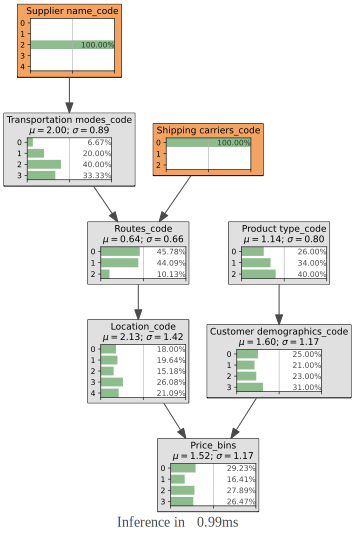

In [42]:
gnb.showInference(bn2, evs={"Supplier name_code":2, "Shipping carriers_code":0})

#### What if we want to know some counterfactuals?

Let's say that we want to know what will happen if we choose the highest price bin and females as customer demography.

In [61]:
df[["Supplier name", "Supplier name_code", "Shipping carriers","Shipping carriers_code", 
    "Routes", "Routes_code", "Product type", "Product type_code", "Location", "Location_code",
    "Customer demographics", "Customer demographics_code",
    "Price_bins","Price_bins_vals"]].head()

,Supplier name,Supplier name_code,Shipping carriers,Shipping carriers_code,Routes,Routes_code,Product type,Product type_code,Location,Location_code,Customer demographics,Customer demographics_code,Price_bins,Price_bins_vals
0,Supplier 3,2,Carrier B,1,Route B,1,haircare,1,Mumbai,4,Non-binary,2,2,"(50.436, 74.803]"
1,Supplier 3,2,Carrier A,0,Route B,1,skincare,2,Mumbai,4,Female,0,0,"(1.603, 26.068]"
2,Supplier 1,0,Carrier B,1,Route C,2,haircare,1,Mumbai,4,Unknown,3,0,"(1.603, 26.068]"
3,Supplier 5,4,Carrier C,2,Route A,0,skincare,2,Kolkata,3,Non-binary,2,2,"(50.436, 74.803]"
4,Supplier 1,0,Carrier A,0,Route A,0,skincare,2,Delhi,2,Non-binary,2,0,"(1.603, 26.068]"


Given that we chose the highest price and females as customers, suddenly shipping carrier changes to carrier B <br>
and route C becomes more likely. But see what happens to location. It disappears on Mumbai and Bangalore. <br>
<br>
<br>
You might wonder, probably the dataset has no females in it for Mumbai and Bangalore. But that's not the case! <br>
Therefore, our conclusions are that if we want to target female customers with high prices <br>
we should focus on Chennai, Delhi, and Kolkata.

In [54]:
df[["Supplier name", "Supplier name_code", "Shipping carriers","Shipping carriers_code", 
    "Routes", "Routes_code", "Product type", "Product type_code", "Location", "Location_code",
    "Customer demographics", "Customer demographics_code",
    "Price_bins","Price_bins_vals"]].query("Location_code in [0, 4]").head(10)

,Supplier name,Supplier name_code,Shipping carriers,Shipping carriers_code,Routes,Routes_code,Product type,Product type_code,Location,Location_code,Customer demographics,Customer demographics_code,Price_bins,Price_bins_vals
0,Supplier 3,2,Carrier B,1,Route B,1,haircare,1,Mumbai,4,Non-binary,2,2,"(50.436, 74.803]"
1,Supplier 3,2,Carrier A,0,Route B,1,skincare,2,Mumbai,4,Female,0,0,"(1.603, 26.068]"
2,Supplier 1,0,Carrier B,1,Route C,2,haircare,1,Mumbai,4,Unknown,3,0,"(1.603, 26.068]"
5,Supplier 4,3,Carrier B,1,Route A,0,haircare,1,Bangalore,0,Non-binary,2,0,"(1.603, 26.068]"
7,Supplier 4,3,Carrier B,1,Route C,2,cosmetics,0,Bangalore,0,Female,0,1,"(26.068, 50.436]"
8,Supplier 4,3,Carrier C,2,Route B,1,cosmetics,0,Mumbai,4,Female,0,2,"(50.436, 74.803]"
13,Supplier 5,4,Carrier A,0,Route B,1,skincare,2,Bangalore,0,Male,1,0,"(1.603, 26.068]"
15,Supplier 1,0,Carrier B,1,Route B,1,skincare,2,Bangalore,0,Non-binary,2,1,"(26.068, 50.436]"
16,Supplier 1,0,Carrier B,1,Route A,0,skincare,2,Bangalore,0,Female,0,0,"(1.603, 26.068]"
24,Supplier 2,1,Carrier C,2,Route A,0,haircare,1,Bangalore,0,Male,1,0,"(1.603, 26.068]"


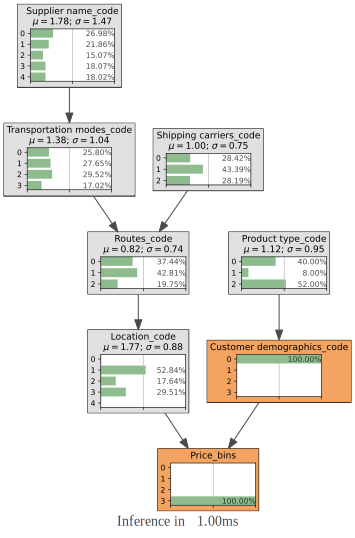

In [46]:
gnb.showInference(bn2, evs={"Price_bins":3, "Customer demographics_code":0})